In [2]:
import matplotlib as mat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
% matplotlib inline

In [3]:
# change the style of matplotlib
mat.style.use('ggplot')

# Read the dataset and have knowledge about some Attributes

In [4]:
# load the twitter_archive_master.csv into dataframe
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_Stage,jpg_url,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,8647,38982
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,6353,33363
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,4214,25146
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,8763,42316
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,9525,40489


In [5]:
# info about the datframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
Dog_Stage                326 non-null object
jpg_url                  1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 218.2+ KB


In [8]:
# Description of some columns from dataset
df[['retweet_count','favorite_count','rating_numerator']].describe()

,retweet_count,favorite_count,rating_numerator
count,1994.000000,1994.000000,1994.00000
mean,2734.104313,8887.410231,12.23008
std,4718.500964,12613.976575,41.46129
min,13.000000,80.000000,0.00000
25%,613.000000,1936.500000,10.00000
50%,1319.500000,4061.500000,11.00000
75%,3142.500000,11199.250000,12.00000
max,77766.000000,143997.000000,1776.00000


Over here we can see that the max rating numerator is 1776 which clearly an outlier as the mean value is  12.23

# Retweet Count vs Favourite Count

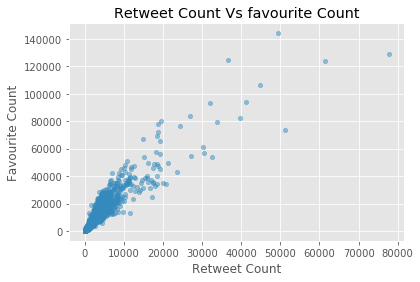

In [10]:
df.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', alpha = 0.5)
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count')
plt.title('Retweet Count Vs favourite Count')

The favourite count and retweet count is approx. directly proportional to each other and there are increasing linearly with each other

# Count Of the Favourite Stage of Dogs

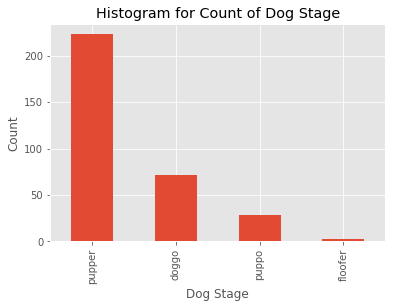

In [14]:
df['Dog_Stage'].value_counts().plot(kind = 'bar')
plt.title('Histogram for Count of Dog Stage')
plt.xlabel('Dog Stage')
plt.ylabel('Count')

# Retweets and Favourites variation according to the timespan

In [18]:
# copy only some variables as needed over here
df_time = df[['retweet_count','favorite_count','rating_numerator','rating_denominator','timestamp']].copy()

In [19]:
df_time.set_index('timestamp',inplace = True)

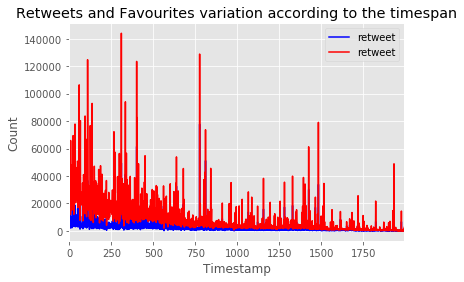

In [24]:
df['retweet_count'].plot(color = 'blue',label = 'retweet')
df['favorite_count'].plot(color = 'red',label = 'favorite')
plt.title('Retweets and Favourites variation according to the timespan')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.legend()


In [29]:
df_time['Rating_ratio'] = df_time['rating_numerator']/df_time['rating_denominator']

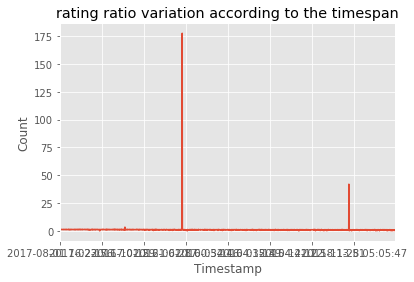

In [31]:
df_time['Rating_ratio'].plot()
plt.title('rating ratio variation according to the timespan')
plt.xlabel('Timestamp')
plt.ylabel('Count')

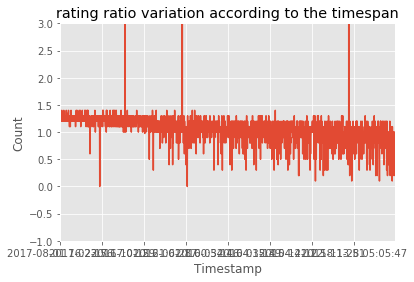

In [33]:
# lets put limitation over y axis to eliminate some outliers
df_time['Rating_ratio'].plot()
plt.ylim(-1,3)
plt.title('rating ratio variation according to the timespan')
plt.xlabel('Timestamp')
plt.ylabel('Count')